# Analiza podatkov iz hribi.net

Za projektno bom analiziral podatke iz [hribi.net](https://www.hribi.net/). Podatke sem zbral za vse države, ki so bile na voljo in za katere so bili na voljo podatki. To vključuje Slovenijo, med drugimi pa tudi Avstrijo, Italijo, Hrvaško, Grčijo in druge. Analiziral bom:

- Slovenske gore
- Gore po svetu
- Poti
- Vplive na priljubljenost gor

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option("display.max_rows", 15)

gore = pd.read_csv("gore.csv", index_col="id")

### Slovenske gore

Za začetek si oglejmo 15 najvišjih slovenskih vrhov.

In [11]:
slovenske_gore = gore[gore["država"].str.contains("Slovenija") & gore["vrsta"].str.contains("vrh")].copy().sort_values("višina", ascending=False)
slovenske_gore[["ime", "višina"]].head(15)

,ime,višina
id,,
101,Triglav,2864
102,Škrlatica,2740
103,Mali Triglav,2725
104,Mangart,2679
105,Visoki Rokav,2646
106,Jalovec,2645
107,Veliki Oltar,2621
108,Velika Martuljška Ponca,2602
109,Razor,2601


Seveda je Triglav najvišji, opazimo pa lahko tudi, da vsi vrhovi segajo krepko čez 2000 metrov nadmorske višine. Zanima nas, koliko dvatisočakov imamo in ali jih je več kakor ostalih vrhov.

<Axes: title={'center': 'Delež dvatisočakov izmed vseh slovenskih gor'}, xlabel='ali je dvatisočak', ylabel='število gor'>

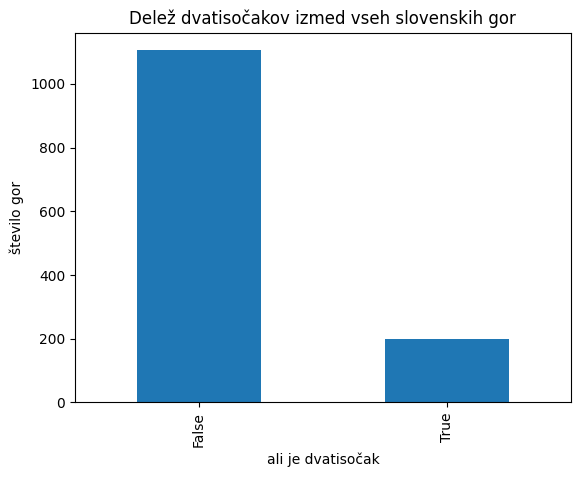

In [24]:
slovenske_gore["dvatisočak"] = slovenske_gore["višina"] >= 2000

slovenske_gore.groupby("dvatisočak").size().plot.bar(title="Delež dvatisočakov izmed vseh slovenskih gor", xlabel="ali je dvatisočak", ylabel="število gor")

Imamo torej okoli 200 dvatisočakov, jih je pa veliko manj kot nižjih vrhov.

### Porazdelitev slovenskih gor po višini

Oglejmo si sedaj, koliko vrhov posameznih višin imamo. Za lažji prikaz bomo zaokrožili višino na stotice. 

<Axes: title={'center': 'Število vrhov v odvisnosti od višine'}, xlabel='Zaokrožena višina', ylabel='Število vrhov'>

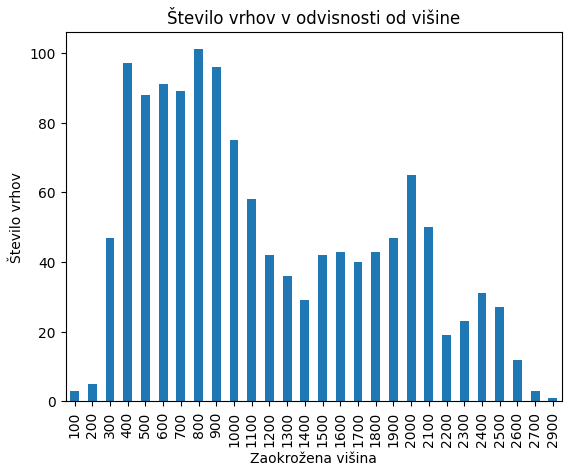

In [26]:
zaokrozena_visina = gore["višina"].round(-2)
gore["zaokrožena višina"] = zaokrozena_visina
slovenske_gore["zaokrožena višina"] = zaokrozena_visina

po_visini = slovenske_gore.groupby("zaokrožena višina").size()
po_visini.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="Zaokrožena višina", ylabel="Število vrhov")

In [27]:
pod_1000 = slovenske_gore["višina"] <= 1000
print(f" Število slovenskih vrhov pod 1000 m: {len(slovenske_gore[pod_1000])}")
print(f" Število slovenskih vrhov nad 1000 m: {len(slovenske_gore[~pod_1000])}")

 Število slovenskih vrhov pod 1000 m: 657
 Število slovenskih vrhov nad 1000 m: 646


Največ je vrhov višine 800 m, veliko je tudi vrhov med 400 m in 900 m. Zanimivo je, da število gor po 900 m višine nekaj časa pada, potem pa zopet zraste. Imamo več vrhov, nižjih od 1000 m kot ostalih, a le za 9 (657 in 646).

### Ločitev na gorovja

Ali so katera gorovja v povprečju višja od drugih? Poglejmo si povprečno višino gor v vsakem gorovju.

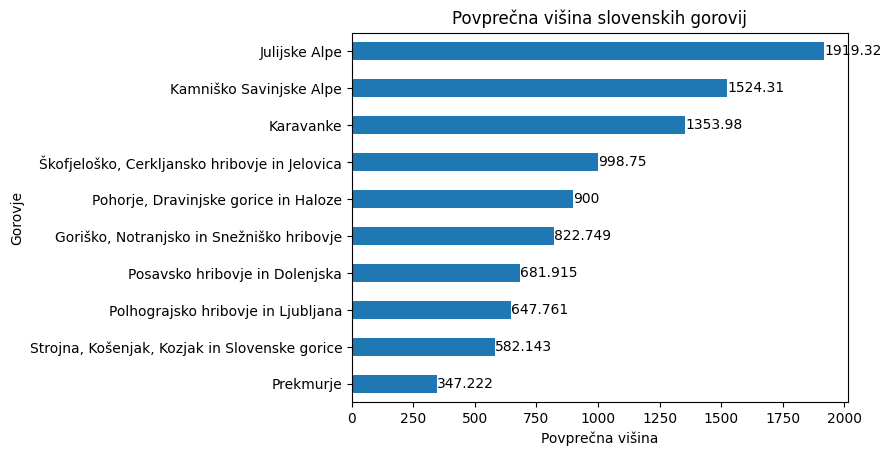

In [28]:
po_gorovju = slovenske_gore.groupby("gorovje")["zaokrožena višina"].mean()
graf_po_gorovju = po_gorovju.sort_values().plot.barh(title="Povprečna višina slovenskih gorovij", xlabel="Povprečna višina", ylabel="Gorovje")
for container in graf_po_gorovju.containers:
    graf_po_gorovju.bar_label(container)

Kot pričakovano, so Julijske Alpe na prvem mestu. Presenetljivo pa je, da je razlika med povprečno višino gore iz Julijskih Alp in gore iz Kamniško Savinjskih Alp večja, kakor je razlika med povprečno višino gore iz Karavank ter hriba iz Škofjeloškega, Cerkljanskega hribovja in Jelovice. Imamo torej večjo razliko v višini med gorami, kakor med gorami in hribi.

Primerjajmo porazdelitev vrhov glede na gorovje, v tem primeru Julijskih Alp, Karavank in Kamniško Savinjskih Alp. Ostala gorovja so bila zaradi nepreglednosti grafa izpuščena.

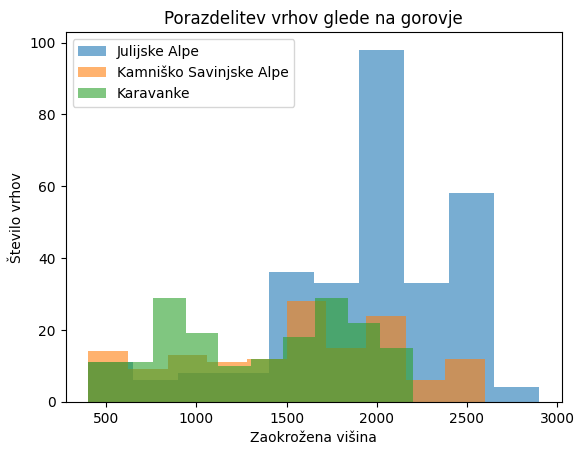

In [29]:
pogoj_za_ja_k_ksa = ((slovenske_gore["gorovje"] == "Julijske Alpe") | (slovenske_gore["gorovje"] == "Karavanke") | (slovenske_gore["gorovje"] == "Kamniško Savinjske Alpe"))
julijske_karavanke_kamnisko_savinjske_alpe = slovenske_gore[pogoj_za_ja_k_ksa]

graf_primerjava = julijske_karavanke_kamnisko_savinjske_alpe.groupby("gorovje")["zaokrožena višina"].plot.hist(
    title="Porazdelitev vrhov glede na gorovje", xlabel="Zaokrožena višina", ylabel="Število vrhov",
    legend=True, alpha=0.6)

Vidimo, da poleg dejstva, da je povprečni vrh iz Julijskih Alp najvišji (kar smo ugotovili že pri prejšnjem grafu), so tudi gore v Julijskih Alpah na sploh občutno višje od gor v Kamniško Savinjskih Alpah in Karavankah. Zdi se tudi, da se največ vrhov izmed teh treh gorovij nahaja v Julijskih Alpah, kar bomo pokazali v naslednjem grafu

### Kakšna je razporeditev vrhov po gorovjih?

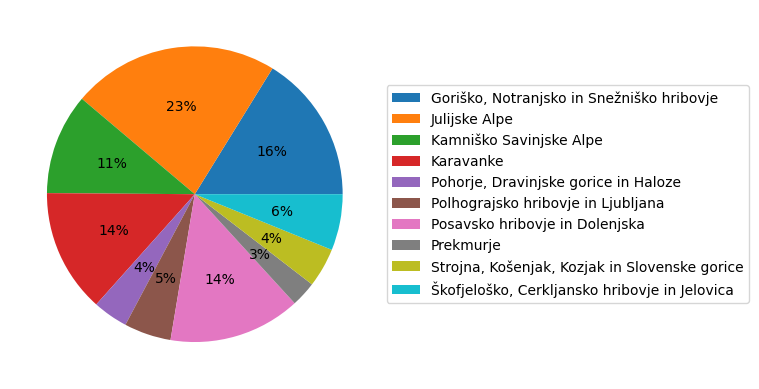

In [30]:
po_gorovju_st_vrhov = slovenske_gore.groupby("gorovje").size()
graf_po_gorovju_st_vrhov = po_gorovju_st_vrhov.plot.pie(legend=True, autopct='%1.0f%%', labels=None)
graf_po_gorovju_st_vrhov.legend(po_gorovju_st_vrhov.index, loc="center left", bbox_to_anchor=(1.0, 0.5))


Največ vrhov se nahaja v Julijskih Alpah, na drugem mestu pa je presenetljivo Goriško, Notranjsko in Snežiško hribovje. Osebno sem pričakoval, da bodo Karavanke ali pa Kamniško Savnijske Alpe na drugem mestu. Kot pa bi lahko pričakovali, je v Prekmurju najmanj vrhov, saj je tam Panonska nižina.

### Svetovne gore

Najprej spoznajmo, za katere države imamo podatke.

<Axes: title={'center': 'Število gor po državah'}, xlabel='Država', ylabel='Število gor'>

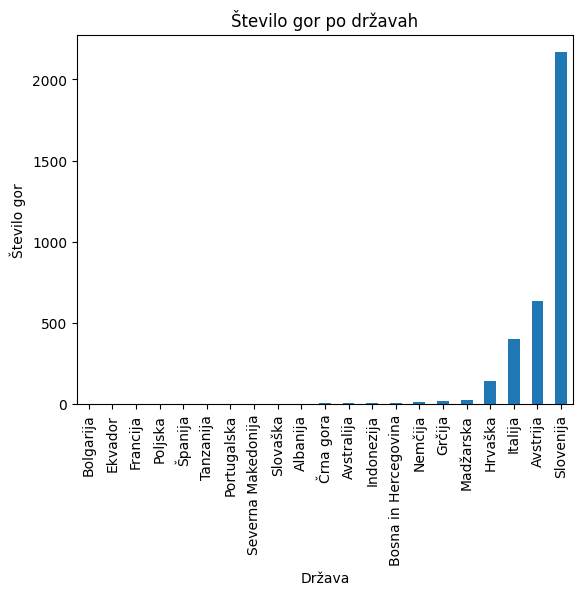

In [31]:
gore_razbito = gore.copy()
gore_razbito['država'] = gore['država'].str.split(', ')     #popravimo, ker nekatere gore vsebujejo več držav
gore_razbito = gore_razbito.explode('država')

po_drzavi_st_vrhov = gore_razbito.groupby("država").size()
po_drzavi_st_vrhov.sort_values().plot.bar(xlabel="Država", ylabel="Število gor", title="Število gor po državah")

Podatki so očitno osredotočeni na ozemlje okoli Slovenije, saj izpuščajo veliko gorovij v ostalih državah.

Kot smo si že ogledali število vrhov v odvisnosti od višine, si oglejmo zdaj še enak graf za vse gore in ne le za slovenske.

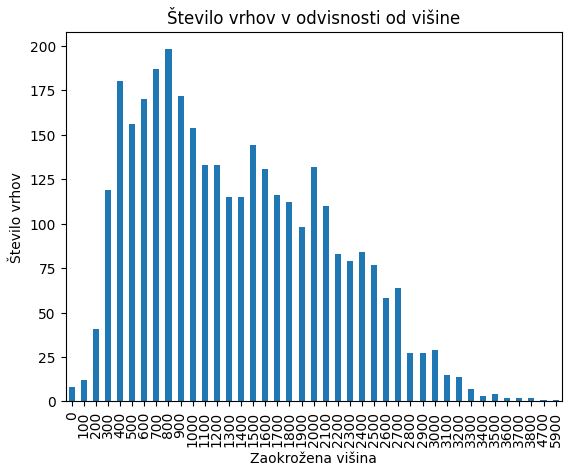

In [32]:
po_visini_vse = gore.groupby("zaokrožena višina").size()
graf_po_visini_vse = po_visini_vse.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="Zaokrožena višina", ylabel="Število vrhov")

Ker prevladujejo podatki iz Slovenije, je graf zelo podoben grafu slovenskih gor, z razliko dodanih višjih vrhov.

### Poti

Koliko označenih poti imamo v Sloveniji?

Število označenih poti: 3353


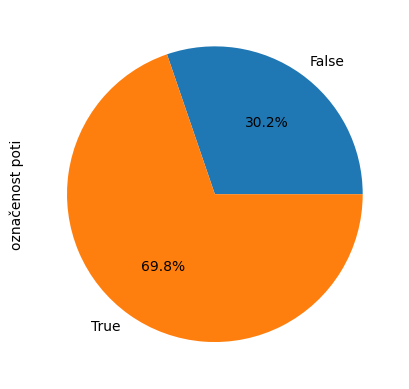

In [33]:
gore_poti = pd.read_csv("gore_poti.csv")
gore_okolica = pd.read_csv("gore_okolica.csv")

slo_gore_z_potmi = pd.merge(slovenske_gore, gore_poti, left_on="id", right_on="id")
oznacene_slo = slo_gore_z_potmi["zahtevnost"].str.contains(" označena ") 
slo_gore_z_potmi["označenost"] = oznacene_slo

slo_gore_z_potmi.groupby("označenost").size().plot.pie(ylabel="označenost poti", autopct='%1.1f%%')

st_oznacenih_slo = len(slo_gore_z_potmi[oznacene_slo])
print(f"Število označenih poti: {st_oznacenih_slo}")



Imamo kar 3353 označenih poti, ki predstavljajo 69.8 % vseh poti.

Kaj pa po svetu? Ali je več označenih ali neoznačenih poti?

<Axes: ylabel='označenost poti'>

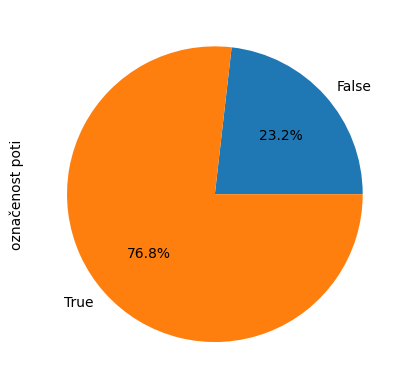

In [34]:
vse_gore_z_potmi = pd.merge(gore_razbito, gore_poti, left_on="id", right_on="id")
oznacene_vse = vse_gore_z_potmi["zahtevnost"].str.contains(" označena ")
vse_gore_z_potmi["označenost"] = oznacene_vse

vse_gore_z_potmi.groupby("označenost").size().plot.pie(ylabel="označenost poti", autopct='%1.1f%%')


Po svetu je torej večji delež označenih poti, kot jih je v Sloveniji.

Pojavi se nam pa še naslednje vprašanje: "Kako vsi ti podatki vplivajo na priljubljenost in število ogledov?"

### Priljubljenost

Ali je višina gore povezana s priljubljenostjo ter številom ogledov? Kaj pa zahtevnost, dolžina poti? Kaj pa okoliški razgled na druge gore? V tem razdelku bomo odgovorili na ta vprašanja. Priljubljenost se meri v odstotkih.

Oglejmo si najprej grafa priljubljenosti v odvisnoti od višine ter ogledov v odvisnosti od višine.

<Axes: title={'center': 'Število ogledov v odvisnosti od višine'}, xlabel='višina', ylabel='število ogledov'>

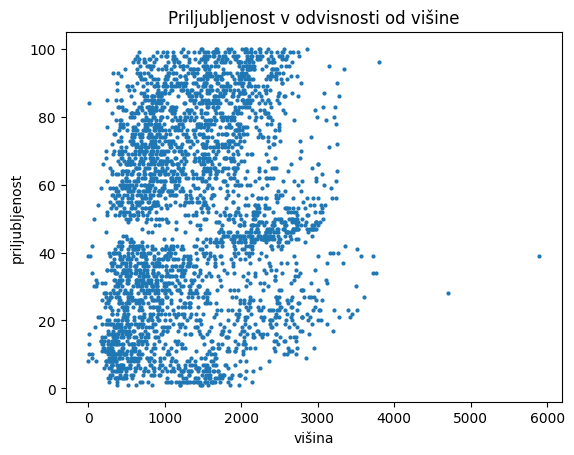

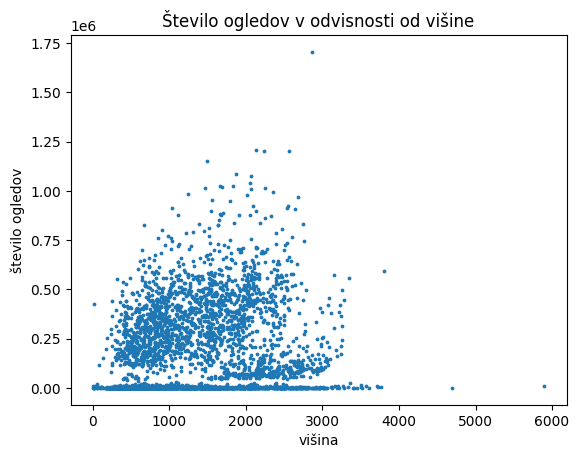

In [35]:
gore.plot.scatter(x = "višina", y="priljubljenost", title="Priljubljenost v odvisnosti od višine", s = 4)
gore.plot.scatter(x= "višina", y="število ogledov", s = 3, title="Število ogledov v odvisnosti od višine")

Očitno ni nobene odvisnosti. Poskusimo še z dolžino poti. Morda so gore, ki imajo daljše poti manj priljubljene.

<Axes: xlabel='dolžina poti v urah', ylabel='priljubljenost'>

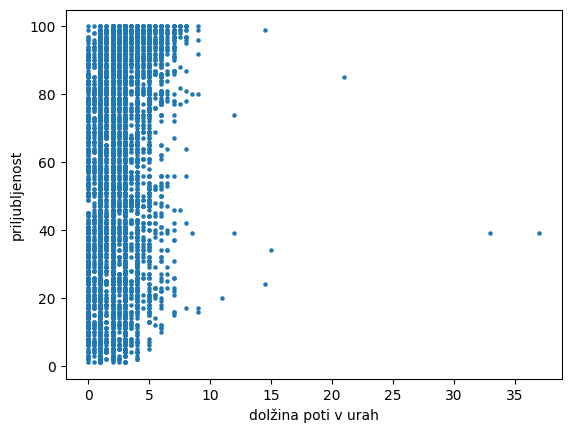

In [36]:
gore_z_potmi = pd.merge(gore, gore_poti, left_on="id", right_on="id")

def zaokrozi_cas(cas):
    ure_minute = cas.split(" ")
    if len(ure_minute) == 2 and "h" in ure_minute:      #samo ure
        return int(ure_minute[0])
    elif len(ure_minute) == 2 and "min" in ure_minute:       #samo minute
        minute = int(ure_minute[0])
        if minute < 30:
            return 0
        elif minute == 30:
            return 0.5
        else:
            return 1
    else:
        ure = int(ure_minute[0])
        minute = int(ure_minute[2])
        if minute < 30:
            return ure
        elif minute == 30:
            return ure + 0.5
        else:
            return ure + 1

gore_z_potmi["dolžina poti v urah"] = gore_z_potmi["čas"].apply(zaokrozi_cas)
gore_z_potmi.plot.scatter(x = "dolžina poti v urah", y="priljubljenost", s=5)

Tudi tukaj ni nobene očitne povezave.

Skoraj gotovo pa morata biti povezana priljubljenost in število ogledov. Oglejmo si torej graf priljubljenosti v odvisnosti od števila ogledov.

<Axes: title={'center': 'Priljubljenost v odvisnosti od števila ogledov'}, xlabel='število ogledov', ylabel='priljubljenost'>

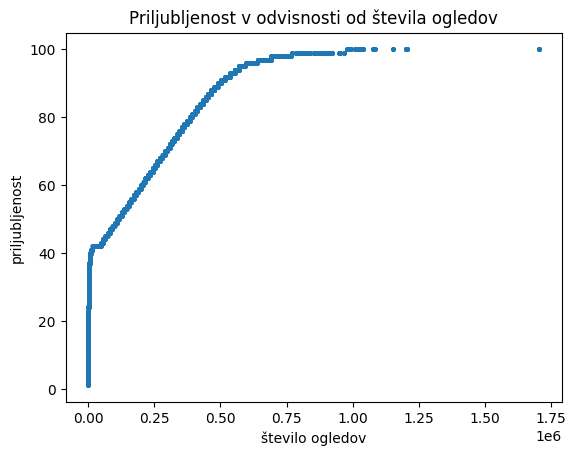

In [37]:
gore_z_potmi.plot.scatter(x = "število ogledov", y="priljubljenost", s=5, title="Priljubljenost v odvisnosti od števila ogledov")

Graf spominja na logaritemsko funkcijo. Izgleda, da je bila priljubljenost izračunana prek logaritma števila ogledov.

Kako pa vpliva število okoliških vrhov v okolici 2 km na priljubljenost?

<Axes: title={'center': 'Priljubljenost v odvisnosti od števila sosedov'}, xlabel='število sosedov v okolici 2 km', ylabel='priljubljenost'>

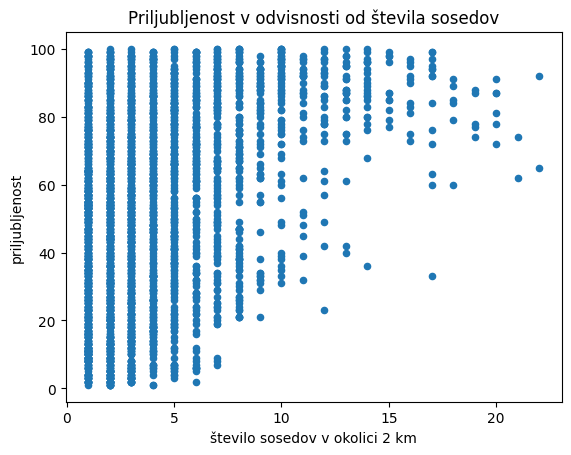

In [38]:
gore_sosedje = pd.merge(gore, gore_okolica, left_on="id", right_on="id")
gore["število sosedov v okolici 2 km"] = gore_sosedje.groupby("id").size()
gore.plot.scatter(x = "število sosedov v okolici 2 km", y="priljubljenost", title="Priljubljenost v odvisnosti od števila sosedov")

Izgleda, da je za goro z večjim številom sosedov bolj verjetno, da je priljubljena. Pri manjšem številu sosedov število sosedov ne vpliva na priljubljenost.

In [48]:
fig = px.scatter_geo(
    gore, 
    lat='širina', 
    lon='dolžina', 
    hover_name="ime", 
    hover_data=["država", "višina", "vrsta"]
)

fig.update_layout(
    margin={"r":0,"l":0, "b": 0, "t": 0},  
    geo=dict(
        landcolor="lightgray", 
        showcountries=True,  
        countrycolor="white",  
        projection_scale=1.5, 
        center= {"lat": 46.37832, "lon": 13.83648},  # Triglav
        fitbounds="locations",  
    ),
)

fig.show()

### Ugotovitve

Iz podatkov smo ugotovili:

- podatki so osredotočeni na Slovenijo
- v Sloveniji imamo več vrhov pod 1000 m kot vrhov nad 1000 m
- Julijske Alpe so daleč najvišje
- večina gorskih poti je označenih
- število okoliških vrhov delno vpliva na priljubljenost vrha